In [4]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [6]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

In [10]:
from nltk.corpus import stopwords

In [33]:
import collections

In [2]:
tweets_df2=pd.read_csv("TweetData.csv")

In [3]:
tweets_df2.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2021-10-01 23:59:54+00:00,1444089723178270725,"@TesCalendar Also, my partner was complaining ...",rachellee221
1,1,2021-10-01 23:59:54+00:00,1444089723006251015,Imagine elon tweet tommorow tesla accepting bi...,bikkianand
2,2,2021-10-01 23:59:48+00:00,1444089697228271617,.FutureJurvetson .tgwozdz .Tesla .elonmusk .br...,AverageBotFan
3,3,2021-10-01 23:59:19+00:00,1444089577837367299,ouvindo colapso dentro desse tesla,pvtlovex
4,4,2021-10-01 23:58:59+00:00,1444089490247663622,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO I...,TCB_NYC


In [5]:
print('Dataset size:',tweets_df2.shape)
print('Columns are:',tweets_df2.columns)

Dataset size: (15030, 5)
Columns are: Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username'], dtype='object')


In [7]:
df  = pd.DataFrame(tweets_df2[['Username', 'Text']])

In [8]:
df.head()

,Username,Text
0,rachellee221,"@TesCalendar Also, my partner was complaining that Tesla didn’t have a spare, so we went and loo..."
1,bikkianand,Imagine elon tweet tommorow tesla accepting bitcoin again can we see 100k before sunset.
2,AverageBotFan,.FutureJurvetson .tgwozdz .Tesla .elonmusk .bri_the_cheesy u fukin fake
3,pvtlovex,ouvindo colapso dentro desse tesla
4,TCB_NYC,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK


In [9]:
string.punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['Text'].apply(lambda x: remove_punct(x))
df.head(10)

,Username,Text,Tweet_punct
0,rachellee221,"@TesCalendar Also, my partner was complaining that Tesla didn’t have a spare, so we went and loo...",TesCalendar Also my partner was complaining that Tesla didn’t have a spare so we went and looked...
1,bikkianand,Imagine elon tweet tommorow tesla accepting bitcoin again can we see 100k before sunset.,Imagine elon tweet tommorow tesla accepting bitcoin again can we see k before sunset
2,AverageBotFan,.FutureJurvetson .tgwozdz .Tesla .elonmusk .bri_the_cheesy u fukin fake,FutureJurvetson tgwozdz Tesla elonmusk brithecheesy u fukin fake
3,pvtlovex,ouvindo colapso dentro desse tesla,ouvindo colapso dentro desse tesla
4,TCB_NYC,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK
5,pvpa_zan,The acceleration on them Tesla’s is ridiculous 🥴,The acceleration on them Tesla’s is ridiculous 🥴
6,justajunkdrawe1,@24_7TeslaNews @elonmusk @Tesla Not sure what’s exciting here,TeslaNews elonmusk Tesla Not sure what’s exciting here
7,Mohamed14123050,@meryy_tesla https://t.co/ERuXZazLB1,meryytesla httpstcoERuXZazLB
8,johnboyayers88,@PoliticsForAlI @LBCNews Even Tesla wanna run these over,PoliticsForAlI LBCNews Even Tesla wanna run these over
9,ElSleepyFloyd,@RexChapman I be driving like this looking hard w/ my Tesla windows rolled up while bumping the ...,RexChapman I be driving like this looking hard w my Tesla windows rolled up while bumping the In...


In [12]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,Username,Text,Tweet_punct,Tweet_tokenized
0,rachellee221,"@TesCalendar Also, my partner was complaining that Tesla didn’t have a spare, so we went and loo...",TesCalendar Also my partner was complaining that Tesla didn’t have a spare so we went and looked...,"[tescalendar, also, my, partner, was, complaining, that, tesla, didn, t, have, a, spare, so, we,..."
1,bikkianand,Imagine elon tweet tommorow tesla accepting bitcoin again can we see 100k before sunset.,Imagine elon tweet tommorow tesla accepting bitcoin again can we see k before sunset,"[imagine, elon, tweet, tommorow, tesla, accepting, bitcoin, again, can, we, see, k, before, sunset]"
2,AverageBotFan,.FutureJurvetson .tgwozdz .Tesla .elonmusk .bri_the_cheesy u fukin fake,FutureJurvetson tgwozdz Tesla elonmusk brithecheesy u fukin fake,"[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]"
3,pvtlovex,ouvindo colapso dentro desse tesla,ouvindo colapso dentro desse tesla,"[ouvindo, colapso, dentro, desse, tesla]"
4,TCB_NYC,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,"[oh, yeah, just, found, out, tesla, note, is, also, in, this, season, fuk]"


In [43]:
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['http','https','Elon','elonmusk','tesla'])
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

,Username,Text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,rachellee221,"@TesCalendar Also, my partner was complaining that Tesla didn’t have a spare, so we went and loo...",TesCalendar Also my partner was complaining that Tesla didn’t have a spare so we went and looked...,"[tescalendar, also, my, partner, was, complaining, that, tesla, didn, t, have, a, spare, so, we,...","[tescalendar, also, partner, complaining, spare, went, looked, trunk, area, discovered, spare, e...","[tescalendar, also, partner, complain, tesla, spare, went, look, trunk, area, discov, spare, eit...","[tescalendar, also, partner, complaining, tesla, spare, went, looked, trunk, area, discovered, s..."
1,bikkianand,Imagine elon tweet tommorow tesla accepting bitcoin again can we see 100k before sunset.,Imagine elon tweet tommorow tesla accepting bitcoin again can we see k before sunset,"[imagine, elon, tweet, tommorow, tesla, accepting, bitcoin, again, can, we, see, k, before, sunset]","[imagine, elon, tweet, tommorow, accepting, bitcoin, see, k, sunset]","[imagin, elon, tweet, tommorow, tesla, accept, bitcoin, see, k, sunset]","[imagine, elon, tweet, tommorow, tesla, accepting, bitcoin, see, k, sunset]"
2,AverageBotFan,.FutureJurvetson .tgwozdz .Tesla .elonmusk .bri_the_cheesy u fukin fake,FutureJurvetson tgwozdz Tesla elonmusk brithecheesy u fukin fake,"[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesi, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]"
3,pvtlovex,ouvindo colapso dentro desse tesla,ouvindo colapso dentro desse tesla,"[ouvindo, colapso, dentro, desse, tesla]","[ouvindo, colapso, dentro, desse]","[ouvindo, colapso, dentro, dess, tesla]","[ouvindo, colapso, dentro, desse, tesla]"
4,TCB_NYC,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,"[oh, yeah, just, found, out, tesla, note, is, also, in, this, season, fuk]","[oh, yeah, found, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]"
5,pvpa_zan,The acceleration on them Tesla’s is ridiculous 🥴,The acceleration on them Tesla’s is ridiculous 🥴,"[the, acceleration, on, them, tesla, s, is, ridiculous, ]","[acceleration, ridiculous, ]","[acceler, tesla, ridicul, ]","[acceleration, tesla, ridiculous, ]"
6,justajunkdrawe1,@24_7TeslaNews @elonmusk @Tesla Not sure what’s exciting here,TeslaNews elonmusk Tesla Not sure what’s exciting here,"[teslanews, elonmusk, tesla, not, sure, what, s, exciting, here]","[teslanews, sure, exciting]","[teslanew, elonmusk, tesla, sure, excit]","[teslanews, elonmusk, tesla, sure, exciting]"
7,Mohamed14123050,@meryy_tesla https://t.co/ERuXZazLB1,meryytesla httpstcoERuXZazLB,"[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]"
8,johnboyayers88,@PoliticsForAlI @LBCNews Even Tesla wanna run these over,PoliticsForAlI LBCNews Even Tesla wanna run these over,"[politicsforali, lbcnews, even, tesla, wanna, run, these, over]","[politicsforali, lbcnews, even, wanna, run]","[politicsforali, lbcnew, even, tesla, wanna, run]","[politicsforali, lbcnews, even, tesla, wanna, run]"
9,ElSleepyFloyd,@RexChapman I be driving like this looking hard w/ my Tesla windows rolled up while bumping the ...,RexChapman I be driving like this looking hard w my Tesla windows rolled up while bumping the In...,"[rexchapman, i, be, driving, like, this, looking, hard, w, my, tesla, windows, rolled, up, while...","[rexchapman, driving, like, looking, hard, w, windows, rolled, bumping, heights, soundtrack, htt...","[rexchapman, drive, like, look, hard, w, tesla, window, roll, bump, height, soundtrack, httpstco...","[rexchapman, driving, like, looking, hard

In [14]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df['Tweet_stemmed'] = df['Tweet_nonstop'].apply(lambda x: stemming(x))
df.head()

,Username,Text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,rachellee221,"@TesCalendar Also, my partner was complaining that Tesla didn’t have a spare, so we went and loo...",TesCalendar Also my partner was complaining that Tesla didn’t have a spare so we went and looked...,"[tescalendar, also, my, partner, was, complaining, that, tesla, didn, t, have, a, spare, so, we,...","[tescalendar, also, partner, complaining, tesla, spare, went, looked, trunk, area, discovered, s...","[tescalendar, also, partner, complain, tesla, spare, went, look, trunk, area, discov, spare, eit..."
1,bikkianand,Imagine elon tweet tommorow tesla accepting bitcoin again can we see 100k before sunset.,Imagine elon tweet tommorow tesla accepting bitcoin again can we see k before sunset,"[imagine, elon, tweet, tommorow, tesla, accepting, bitcoin, again, can, we, see, k, before, sunset]","[imagine, elon, tweet, tommorow, tesla, accepting, bitcoin, see, k, sunset]","[imagin, elon, tweet, tommorow, tesla, accept, bitcoin, see, k, sunset]"
2,AverageBotFan,.FutureJurvetson .tgwozdz .Tesla .elonmusk .bri_the_cheesy u fukin fake,FutureJurvetson tgwozdz Tesla elonmusk brithecheesy u fukin fake,"[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesi, u, fukin, fake]"
3,pvtlovex,ouvindo colapso dentro desse tesla,ouvindo colapso dentro desse tesla,"[ouvindo, colapso, dentro, desse, tesla]","[ouvindo, colapso, dentro, desse, tesla]","[ouvindo, colapso, dentro, dess, tesla]"
4,TCB_NYC,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,"[oh, yeah, just, found, out, tesla, note, is, also, in, this, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]"


In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/gayatrikvr/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [22]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_lemmatized'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

,Username,Text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,rachellee221,"@TesCalendar Also, my partner was complaining that Tesla didn’t have a spare, so we went and loo...",TesCalendar Also my partner was complaining that Tesla didn’t have a spare so we went and looked...,"[tescalendar, also, my, partner, was, complaining, that, tesla, didn, t, have, a, spare, so, we,...","[tescalendar, also, partner, complaining, tesla, spare, went, looked, trunk, area, discovered, s...","[tescalendar, also, partner, complain, tesla, spare, went, look, trunk, area, discov, spare, eit...","[tescalendar, also, partner, complaining, tesla, spare, went, looked, trunk, area, discovered, s..."
1,bikkianand,Imagine elon tweet tommorow tesla accepting bitcoin again can we see 100k before sunset.,Imagine elon tweet tommorow tesla accepting bitcoin again can we see k before sunset,"[imagine, elon, tweet, tommorow, tesla, accepting, bitcoin, again, can, we, see, k, before, sunset]","[imagine, elon, tweet, tommorow, tesla, accepting, bitcoin, see, k, sunset]","[imagin, elon, tweet, tommorow, tesla, accept, bitcoin, see, k, sunset]","[imagine, elon, tweet, tommorow, tesla, accepting, bitcoin, see, k, sunset]"
2,AverageBotFan,.FutureJurvetson .tgwozdz .Tesla .elonmusk .bri_the_cheesy u fukin fake,FutureJurvetson tgwozdz Tesla elonmusk brithecheesy u fukin fake,"[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesi, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]"
3,pvtlovex,ouvindo colapso dentro desse tesla,ouvindo colapso dentro desse tesla,"[ouvindo, colapso, dentro, desse, tesla]","[ouvindo, colapso, dentro, desse, tesla]","[ouvindo, colapso, dentro, dess, tesla]","[ouvindo, colapso, dentro, desse, tesla]"
4,TCB_NYC,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,"[oh, yeah, just, found, out, tesla, note, is, also, in, this, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]"


In [77]:
df['liststring'] = [','.join(map(str, l)) for l in df['Tweet_lemmatized']]
df.head()

,Username,Text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,liststring
2,AverageBotFan,.FutureJurvetson .tgwozdz .Tesla .elonmusk .bri_the_cheesy u fukin fake,FutureJurvetson tgwozdz Tesla elonmusk brithecheesy u fukin fake,"[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesi, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","futurejurvetson,tgwozdz,tesla,elonmusk,brithecheesy,u,fukin,fake"
3,pvtlovex,ouvindo colapso dentro desse tesla,ouvindo colapso dentro desse tesla,"[ouvindo, colapso, dentro, desse, tesla]","[ouvindo, colapso, dentro, desse]","[ouvindo, colapso, dentro, dess, tesla]","[ouvindo, colapso, dentro, desse, tesla]","ouvindo,colapso,dentro,desse,tesla"
4,TCB_NYC,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,"[oh, yeah, just, found, out, tesla, note, is, also, in, this, season, fuk]","[oh, yeah, found, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","oh,yeah,found,tesla,note,also,season,fuk"
5,pvpa_zan,The acceleration on them Tesla’s is ridiculous 🥴,The acceleration on them Tesla’s is ridiculous 🥴,"[the, acceleration, on, them, tesla, s, is, ridiculous, ]","[acceleration, ridiculous, ]","[acceler, tesla, ridicul, ]","[acceleration, tesla, ridiculous, ]","acceleration,tesla,ridiculous,"
7,Mohamed14123050,@meryy_tesla https://t.co/ERuXZazLB1,meryytesla httpstcoERuXZazLB,"[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","meryytesla,httpstcoeruxzazlb"


In [82]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


In [79]:
!pip install textblob

     |████████████████████████████████| 636 kB 3.9 MB/s eta 0:00:01


In [83]:
df['Subjectivity'] = df['liststring'].apply(getSubjectivity) 
df['Polarity'] = df['liststring'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df.head()

,Username,Text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,liststring,Subjectivity,Polarity,Analysis
2,AverageBotFan,.FutureJurvetson .tgwozdz .Tesla .elonmusk .bri_the_cheesy u fukin fake,FutureJurvetson tgwozdz Tesla elonmusk brithecheesy u fukin fake,"[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesi, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","futurejurvetson,tgwozdz,tesla,elonmusk,brithecheesy,u,fukin,fake",0.0,0.0,Neutral
3,pvtlovex,ouvindo colapso dentro desse tesla,ouvindo colapso dentro desse tesla,"[ouvindo, colapso, dentro, desse, tesla]","[ouvindo, colapso, dentro, desse]","[ouvindo, colapso, dentro, dess, tesla]","[ouvindo, colapso, dentro, desse, tesla]","ouvindo,colapso,dentro,desse,tesla",0.0,0.0,Neutral
4,TCB_NYC,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,"[oh, yeah, just, found, out, tesla, note, is, also, in, this, season, fuk]","[oh, yeah, found, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","oh,yeah,found,tesla,note,also,season,fuk",0.0,0.0,Neutral
5,pvpa_zan,The acceleration on them Tesla’s is ridiculous 🥴,The acceleration on them Tesla’s is ridiculous 🥴,"[the, acceleration, on, them, tesla, s, is, ridiculous, ]","[acceleration, ridiculous, ]","[acceler, tesla, ridicul, ]","[acceleration, tesla, ridiculous, ]","acceleration,tesla,ridiculous,",0.0,0.0,Neutral
7,Mohamed14123050,@meryy_tesla https://t.co/ERuXZazLB1,meryytesla httpstcoERuXZazLB,"[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","meryytesla,httpstcoeruxzazlb",0.0,0.0,Neutral


In [84]:
tb_counts = df.Analysis.value_counts()

tb_counts

Neutral    15027
Name: Analysis, dtype: int64

In [88]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df['Vader Sentiment'] = df['liststring'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
df['Vader Analysis'] = df['Vader Sentiment'].apply(vader_analysis)
df.head()

,Username,Text,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized,liststring,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
2,AverageBotFan,.FutureJurvetson .tgwozdz .Tesla .elonmusk .bri_the_cheesy u fukin fake,FutureJurvetson tgwozdz Tesla elonmusk brithecheesy u fukin fake,"[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, brithecheesy, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesi, u, fukin, fake]","[futurejurvetson, tgwozdz, tesla, elonmusk, brithecheesy, u, fukin, fake]","futurejurvetson,tgwozdz,tesla,elonmusk,brithecheesy,u,fukin,fake",0.0,0.0,Neutral,0.0,Neutral
3,pvtlovex,ouvindo colapso dentro desse tesla,ouvindo colapso dentro desse tesla,"[ouvindo, colapso, dentro, desse, tesla]","[ouvindo, colapso, dentro, desse]","[ouvindo, colapso, dentro, dess, tesla]","[ouvindo, colapso, dentro, desse, tesla]","ouvindo,colapso,dentro,desse,tesla",0.0,0.0,Neutral,0.0,Neutral
4,TCB_NYC,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,OH YEAH\n\nJUST FOUND OUT TESLA NOTE IS ALSO IN THIS SEASON\n\nFUK,"[oh, yeah, just, found, out, tesla, note, is, also, in, this, season, fuk]","[oh, yeah, found, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","[oh, yeah, found, tesla, note, also, season, fuk]","oh,yeah,found,tesla,note,also,season,fuk",0.0,0.0,Neutral,0.0,Neutral
5,pvpa_zan,The acceleration on them Tesla’s is ridiculous 🥴,The acceleration on them Tesla’s is ridiculous 🥴,"[the, acceleration, on, them, tesla, s, is, ridiculous, ]","[acceleration, ridiculous, ]","[acceler, tesla, ridicul, ]","[acceleration, tesla, ridiculous, ]","acceleration,tesla,ridiculous,",0.0,0.0,Neutral,0.0,Neutral
7,Mohamed14123050,@meryy_tesla https://t.co/ERuXZazLB1,meryytesla httpstcoERuXZazLB,"[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","[meryytesla, httpstcoeruxzazlb]","meryytesla,httpstcoeruxzazlb",0.0,0.0,Neutral,0.0,Neutral


In [86]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 6.0 MB/s eta 0:00:01


In [89]:
vader_counts = df['Vader Analysis'].value_counts()
vader_counts

Neutral    15027
Name: Vader Analysis, dtype: int64

In [44]:
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    stopword.extend(['http','https','Elon','elonmusk','tesla'])
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    lemmatizer = nltk.WordNetLemmatizer()
    text =[lemmatizer.lemmatize(t) for t in text]
    return text

In [45]:
sentence=" ".join(review for review in df.Text)
new_token=clean_text(sentence)

In [46]:
counted = collections.Counter(new_tokens)

In [47]:
counted

Counter({'tescalendar': 2,
         'also': 386,
         'partner': 17,
         'complain': 27,
         'tesla': 15887,
         'spare': 9,
         'went': 85,
         'look': 420,
         'trunk': 6,
         'area': 54,
         'discov': 12,
         'either': 74,
         'idea': 108,
         'imagin': 71,
         'elon': 898,
         'tweet': 171,
         'tommorow': 1,
         'accept': 164,
         'bitcoin': 276,
         'see': 458,
         'k': 292,
         'sunset': 4,
         'futurejurvetson': 3,
         'tgwozdz': 2,
         'elonmusk': 3626,
         'brithecheesi': 1,
         'u': 472,
         'fukin': 1,
         'fake': 42,
         'ouvindo': 2,
         'colapso': 2,
         'dentro': 5,
         'des': 6,
         'oh': 100,
         'yeah': 126,
         'found': 56,
         'note': 86,
         'season': 9,
         'fuk': 2,
         'acceler': 34,
         'ridicul': 24,
         'teslanew': 7,
         'sure': 203,
         'excit': 48,
 

In [61]:
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

In [68]:
word_freq=word_freq.head(22)

In [69]:
word_freq

,word,frequency
4,tesla,15887
24,elonmusk,3626
112,car,1283
53,like,1066
127,get,967
198,de,918
14,elon,898
337,model,751
162,go,741
192,one,729


In [74]:
word_freq.drop(word_freq.index[[0,1,6]],inplace=True)

In [75]:
word_freq

,word,frequency
112,car,1283
53,like,1066
127,get,967
198,de,918
337,model,751
162,go,741
192,one,729
423,make,724
126,would,702
457,buy,636


<AxesSubplot:xlabel='frequency', ylabel='word'>

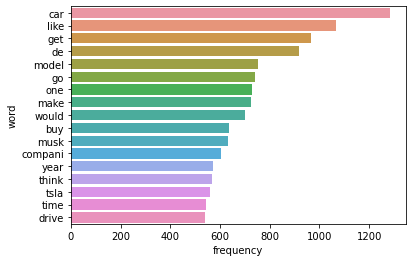

In [76]:
sns.barplot(x='frequency',y='word',data=word_freq)